# 06-1 군집 알고리즘

## 타깃을 모르는 비지도 학습

타깃이 없을 때 사용하는 머신러닝 알고리즘이 있습니다 바로 **비지도 학습**unsupervised learning 입니다.

"사진의 픽셀 값을 모두 평균 내면 비슷한 과일끼리 모이지 않을까?"

## 과일 사진 데이터 준비하기

In [4]:
import requests

url = 'https://bit.ly/fruits_300_data'
response = requests.get(url)

with open('fruits_300.npy', 'wb') as file:
    file.write(response.content)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')

fruits 배열의 크기확인

In [7]:
fruits.shape

(300, 100, 100)

(샘플 개수, 이미지 높이, 이미지 너비) 입니다. 이미지 크기는 100×100 입니다. 각 픽셀은 넘파이 배열으 원소 하나에 대응합니다. 즉 배열의 크기가 100×100입니다.

첫 번재 이미지의 첫 번재 행을 출력하겠습니다.

In [8]:
fruits[0, 0, :]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

첫 번째 행에 있는 픽셀 100개에 들어있는 값을 출력했습니다. 이 넘파이 배열은 흑백 사진을 담고 있으므로 0~255까지의 정숫값을 가집니다.

맷플롯핌의 imshow() 함수를 사용하면 넘파이 배열로 저장된 이미지를 쉽게 그릴 수 있습니다. 흑백 이미지이므로 cmap 매개변수를 'gray'로 지정합니다.

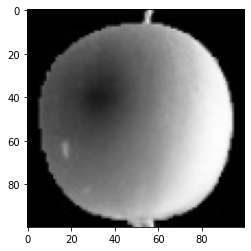

In [9]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

첫 번째 이미지는 사과 같네요.

우리가 보는 것과 컴퓨터가 처리하는 방식이 다르기 때문에 종종 흑백 이미지를 이렇게 반전하여 사용합니다. 관심 대상의 영역을 높은 값으로 바꾸었지만 맷플롯립으로 출력할 때 바탕이 검게 나오므로 보기에는 썩 좋지 않네요. cmap 매개변수를 'gray_r'로 지정하면 다시 반전하여 우리 눈에 보기 좋게 출력합니다.

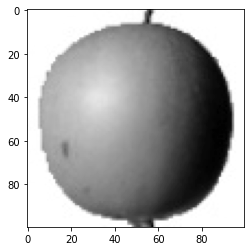

In [10]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

바나나와 파인애플 이미지도 출력하겠습니다.

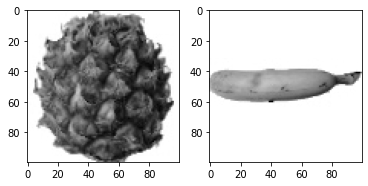

In [11]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

맷플롯립의 subplots() 함수를 사용하면 여러 개의 그래프를 배열처럼 쌓을 수 있도록 도와줍니다.

각 과일 사진의 평균을 내서 차이를 확인해 보죠.

## 픽셀값 분석하기

넘파이 배열을 나눌때 100×100 이미지를 펼쳐서 길이가 10000인 1차원 배열로 만들겠습니다.

In [12]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [13]:
apple.shape

(100, 10000)

각 배열에 들엉ㅆ는 샘플의 픽셀 평균값을 계산해본다. 넘파이 mean() 메서드 사용한다. axis=0으로 하면 첫 번재 축인 행을 따라 계산한다.

In [14]:
apple.mean(axis=1)

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

맷플롯립의 hist() 함수를 사용해 히스토그램을 그려 보죠. alpha 매개변수를 1보다 작게 하면 투명도를 줄 수 있습니다. 또 맷플롯립의 legend() 함수를 사용해 어떤 과일의 히스토그램인지 범례를 만들어 보죠.

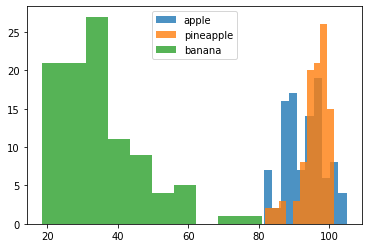

In [15]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

히스토그램을 보면 바나나 사진의 평균값은 40 아래에 집중되어 있습니다. 사과와 파인애플은 90~100 사이에 많이 모여있네요. 이 그림을 보면 바나나는 픽셀 평균값만으로 사과나 파인애플과 확실히 구분됩니다. 바나나는 사진에서 차지하는 영역이 작기 때문에 평균값이 작습니다.

반면 사과와 파인애플은 많이 겹쳐 있어서 픽셀값만으로는 구분하기 쉽지 않습니다.

좀 더 나은 방법은 없을까요? 샘플의 평균값이 아니라 픽셀별 평균값을 비교해 보면 어떨까요. 전체 샘플에 대해 각 픽셀의 평균을 계산하는 거죠.

픽셀의 평균을 계산하는 것도 간단합니다. axis=0으로 지정하면 됩니다.

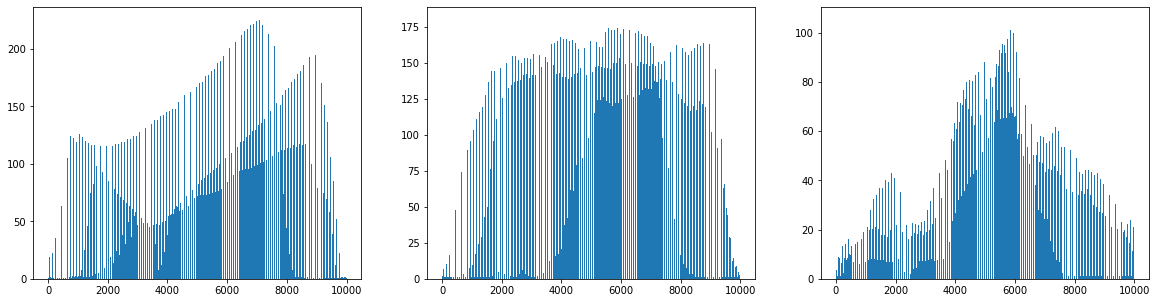

In [16]:
fix, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

순서대로 사과, 파인애플, 바나나 그래프입니다. 과일마다 값이 높은 구간이 다릅니다. 사과는 사진 아래쪽으로 갈수록 높아지고, 파인애플 그래프는 비교적 고르면서 높습니다. 바나나는 확실히 중앙의 픽셀값이 높습니다.

픽셀 평균값을 100×100 크기로 바꿔서 이미지처럼 출력하여 위 그래프와 비교하면 더 좋습니다.

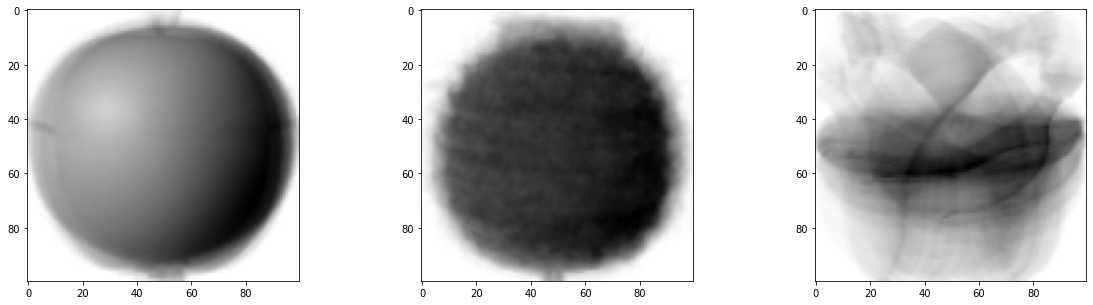

In [17]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

## 평균 값과 가까운 사진 고르기

사과 사진의 평균값인 apple_mean과 가장 가까운 사진을 골라보죠. 3장에서 봤던 절댓값 오차를 사용하겠습니다. fruits 배열에 있는 모든 샘플에서 apple_mean을 뺀 절댓값의 평균을 계산하면 됩니다.

넘파이 abs() 함수는 절댓값을 계산하는 함수입니다. 이 함수는 np.absolute() 함수의 다른 이름입니다.

다음 코드에서 abs_diff는 (300, 100, 100) 크기의 배열입니다. 따라서 각 샘플에 대한 평균을 구하기 위해 axis에 두 번째, 세 번째 차원을 모두 지정했습니다. 이렇게 계산한 abs_mean은 각 샘플의 오차 평균이므로 크기가 (300,)인 1차원 배열입니다.

In [19]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
abs_mean.shape

(300,)

그다음, 이 값이 가장 작은 순서대로 100개를 골라 보겠습니다. np.argsort() 함수는 작은 것에서 큰 순서대로 나열한 abs_mean 배열의 인덱스를 반환합니다. 이 인덱스 중에서 처음 100개를 선택해 10×10 격자로 이루어진 그래프를 그리겠습니다.

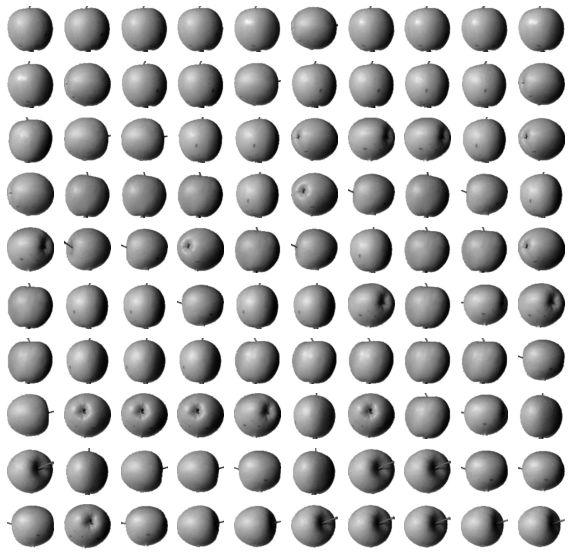

In [20]:
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

apple_mean과 가장 가까운 사진 100개를 골랐더니 모두 사과입니다.

먼저 subplots() 함수로 10×10, 총 100개의 서브 그래프를 만듭니다. 그래프가 많기 때문에 전체 그래프의 크기를 figsize=(10,10)으로 조금 크게 지정했습니다.

이렇게 비슷한 샘플끼리 그룹으로 모으는 작업을 **군집**clustring이라고 합니다. 군집은 대표적인 비지도 학습 작업 중 하나입니다. 군집 알고리즘에서 만든 그룹을 **클러스터**cluster라고 부릅니다.

하지만 우리는 이미 사과, 파인애플, 바나나가 있다는 것을 알고 있었습니다. 즉 타깃값을 알고 있었기 때문에 사과, 파인애플, 바나나의 사진 평균값을 계산해서 가장 가까운 과일을 찾을 수 있었습니다.

타깃값을 모르면서 어떻게 세 과일의 평균값을 찾을 수 있을까요? 다음 2절에서 배울 k-평균 알고리즘이 이 문제를 해결해줍니다.

## 마무리

### 핵심 포인트

- **비지도 학습**: 머신러닝의 한 종류로 훈련 데이터에 타깃이 없음. 대표적인 비지도 학습 작업은 군집, 차원 축소 등
- **히스토그램**: 구간별로 값이 발생한 빈도를 그래프로 표시한 것
- **군집**: 비슷한 샘플끼리 하나의 그룹으로 모으는 대표적인 비지도 학습 작업. 군집 알고리즘으로 모은 샘플 그룹을 클러스터라고 부름

### 확인 문제

2. 본문에서 했던 것처럼 바나나 사진의 평균 banana_mean과 비슷한 사진 100장을 찾아 출력해 보세요. 바나나 사진을 모두 찾을 수 있나요?

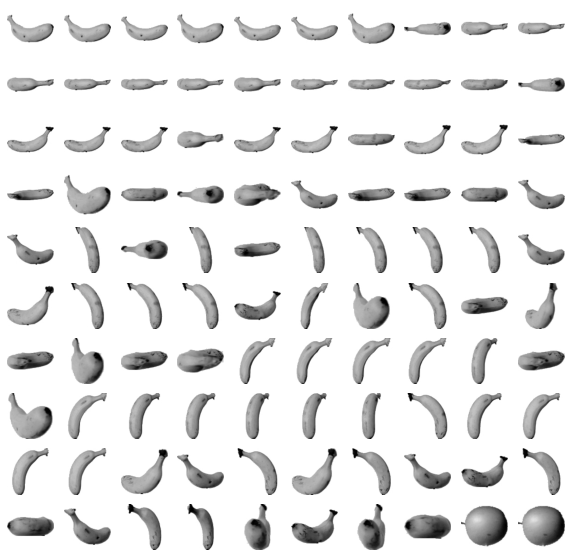

In [24]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

banana_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()